# <font color='#eb3483'> Evaluating Classification Models </font>
In this module, we'll be exploring classification models more in-depth, namely how can we evaluate our models to see how they're performing.

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

import warnings
warnings.simplefilter("ignore")

## <font color='#eb3483'> Preparing our Data </font>

We'll keep using our breast cancer dataset from the last module. We'll quickly get it into a format that will facilitate exploring module evaluation.

In [2]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer["data"],
                         columns=cancer["feature_names"])

cancer_df["target"] = cancer["target"] 

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

We see that this dataset encodes the 0 as malignant and 1 as benign.

**We are going to replace the target 0 with 1, so the positive class is malignant. We do this because usually a positive test means detection of cancer.**

In [4]:
cancer_df["target"] = cancer_df["target"].replace({0:1, 1:0})

We can see the percentage of cases for each class (positive and negative).

In [5]:
cancer_df["target"].value_counts(True)

0    0.627417
1    0.372583
Name: target, dtype: float64

We see there are 62.7% negative cases (benign) and 37.3% positives (malignant).

## <font color='#eb3483'> Training a Model </font>

We will start by training a simple Logistic Regression.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X = cancer_df[cancer["feature_names"]]
y = cancer_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

We fit the model, and generate predicted labels and prediction probabilities

In [8]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

We create an auxiliary function that returns a list of true target values and their predicted labels

# <font color='#eb3483'> Binary Classification Concepts </font>

In Binary classification we have *negative cases* (class 0, on the Breast Cancer dataset would be the benign samples) and *positive cases* (class 1, malignant samples).

- Positive Cases: Cases of class 1 (malignant)
- Negative Cases: Cases of class 0 (benign)

These 2 classes combined with the predictions bring us to 4 possible combinations:

- True positives (TP), would be the samples that are malignant and are correctly classified as malignant. 
- False positives (FP), would be the benign samples that are incorrectly classified as malignant.
- True Negatives (TN), would be the benign samples that are correctly classified as benign.
- False Negatives (FN), would be the malignant samples that are incorrectly classified as benign.

![title](media/classification_errors.png)

## <font color='#eb3483'> **Confusion Matrix** </font>

We can use a confusion matrix to easily compare how a classifier has classified each one of the classes.

![title](media/confusion_matrix.png)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[107,   1],
       [  4,  59]], dtype=int64)

# <font color='#eb3483'> Classification Metrics </font>

<font color='#eb3483'> **Accuracy** </font>

Accuracy is a general measure of the model's performance. It simply measures the percentage of cases correctly classified.

$$Accuracy=\frac{\text{Number of correctly classified observations}}{\text{Total Number of observations}}= \frac{TP+TN}{TP+TN+FP+FN}$$

Sklearn has a function that calculates the accuracy

In [10]:
from sklearn import metrics
metrics.accuracy_score(true_classes, predictions)

0.9707602339181286

<font color='#eb3483'> **Precision** </font>

Precision measures the model's hability to correctly classify as positives the positive cases.

$$Precision=\frac{\text{Number of positive cases correctly classified}}{\text{Number of cases classified as positive}}= \frac{TP}{TP+FP}$$

In [11]:
metrics.precision_score(true_classes, predictions)

0.9833333333333333

<img src="media/precision_accuracy.png" style="width:30em;">

<font color='#eb3483'> **Recall (True Positive Rate, TPR)** </font>
 
Recall gives us an idea of the model's ability to find (detect) all positive cases.

$$Recall=\frac{\text{Number of positive cases correctly classified}}{\text{Number of positive classes}}= \frac{TP}{TP+FN}$$


![title](media/precision_recall.png)

In [12]:
metrics.recall_score(true_classes, predictions)

0.9365079365079365

<font color='#eb3483'> **F1 Score** </font>

F1 score is a weighted measure between recall (that tries to classify as many cases as possible as positive cases) and precision (that tries to classify as positive only real positive cases and limit false positives).

F1 Score is defined as the harmonic mean between precision and recall.

$$F1=2*\frac{1}{\frac{1}{precision}+\frac{1}{recall}}=2*\frac{precision*recall}{precision+recall}$$

f1 score is available in scikit-learn

In [13]:
metrics.f1_score(true_classes, predictions)

0.9593495934959351

###  <font color='#eb3483'> How does a model classify? </font>

An algorithm like logistic regression predicts by measuring distances to a "decission boundary" that are then transformed into class probabilities. 

But at the end of the day we need to know which class to assign to a new observation, and not just the predicted probabilities. Classifiers do that by defining a *threshold* and then assigning a negative class to all those cases with probabilities lower than the threshold and positive those above it.

![title](media/threshold.png)

We usually use the method `model.predict` for predicting a target variable. However, some methods also have a method `predict_proba` that predicts the probabilities that the model consider that the observation has to belong to each one of the classes.

For the binary classification case, `predict_proba` will predict for each observation the probabilities of it being a negative and the probabilities of being a positive case.

In [19]:
 np.set_printoptions(suppress=True) # uncomment this to suppress scientific notation
prediction_probabilities[:5]
#prob of 0/benign, prob of 1/malignant

array([[0.87403005, 0.12596995],
       [0.        , 1.        ],
       [0.00670597, 0.99329403],
       [0.99667448, 0.00332552],
       [0.99871401, 0.00128599]])

In [17]:
df = pd.DataFrame({"true_class":true_classes,
                   "pred_class": predictions,
                   "probabilities_0":model.predict_proba(X_test)[:,0],
                    "probabilities_1":model.predict_proba(X_test)[:,1],
                  })

df["sum_probas"] = df.probabilities_0 + df.probabilities_1

df.sum_probas.head()

204    1.0
70     1.0
131    1.0
431    1.0
540    1.0
Name: sum_probas, dtype: float64

We see that for each row, the sum of the probabilities is 1 (which makes sense since its the whole sample space).

In [18]:
df.sample(10)

,true_class,pred_class,probabilities_0,probabilities_1,sum_probas
30,1,1,2.097870e-09,1.000000,1.0
431,0,0,9.966745e-01,0.003326,1.0
118,1,1,2.993053e-04,0.999701,1.0
364,0,0,9.966007e-01,0.003399,1.0
55,0,0,9.964858e-01,0.003514,1.0
2,1,1,7.257376e-07,0.999999,1.0
86,1,1,4.084128e-01,0.591587,1.0
564,1,1,9.250600e-12,1.000000,1.0
341,0,0,9.908805e-01,0.009119,1.0
362,0,0,9.929251e-01,0.007075,1.0


How does the scikit-learn classifier choose a threshold? Because it has no additional information, it just sets the threshold to 0.5

In [20]:
df.query("probabilities_1>0.5 & pred_class==0")

,true_class,pred_class,probabilities_0,probabilities_1,sum_probas


In [21]:
df.query("probabilities_0>0.5 & pred_class==1")

,true_class,pred_class,probabilities_0,probabilities_1,sum_probas


## <font color='#eb3483'> Area Under the Curve (ROC-AUC) </font>

The Receiving Operating Characteristic [(ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a curve used to evaluate how Recall (TPR) and FPR change based on the threshold. It shows how the model balances the opposing efects of classifying correctly all positive cases without having many false positives.

Just to see how the predictions change based on our threshold level - let's create a function that takes the class probabilities and a desired threshold and returns the predicted class based off that threshold

In [22]:
def probabilities_to_classes(prediction_probabilities, threshold=0.5):
    predictions = np.zeros([len(prediction_probabilities), ])    #create array of zeros
    predictions[prediction_probabilities[:,1]>=threshold] = 1    
    #if the item in the pred_prob >= 0.5, make the value 1
    return predictions

In [23]:
prediction_probabilities[:10]

array([[0.87403005, 0.12596995],
       [0.        , 1.        ],
       [0.00670597, 0.99329403],
       [0.99667448, 0.00332552],
       [0.99871401, 0.00128599],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.00440591, 0.99559409],
       [0.99615059, 0.00384941],
       [0.98097446, 0.01902554]])

Now we can see easily convert those probabilities to predictions

In [24]:
probabilities_to_classes(prediction_probabilities, threshold=0.5)[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

If the threshold is closer to 0, more observations will be a positive

In [25]:
probabilities_to_classes(prediction_probabilities, threshold=0.00001)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

And if the desired threshold is closer to 1, less observations will be predicted as a positive (only those where the model is really really sure about them being a positive)

In [26]:
probabilities_to_classes(prediction_probabilities, threshold=0.99999)[:10]

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0.])

The area under the ROC curve (that is the part of the chart below the curve) is called **Area under the Curve (ROC-AUC or simply AUC)** and is one of the most common metrics on classification problems. It ranges from 0.5 (a random classifier) to 1 (the perfect classifier).

In [27]:
metrics.roc_auc_score(true_classes, predictions)

0.9636243386243386

We can use `sklearn.roc_curve` to generate the ranges for false positive range and true positive range automatically. And we can make the plot so we compare it to a random classifier. *(no need to learn everything, is matplotlib messy code)*

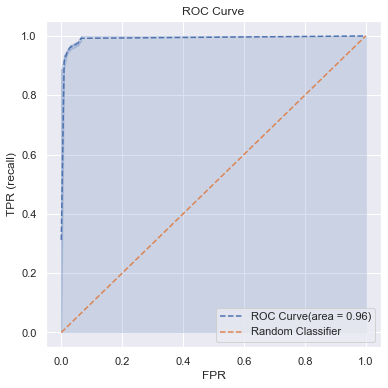

In [28]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f)' % roc_auc)
    sns.lineplot(x=[0,1], y= [0,1], linestyle='--', label = 'Random Classifier')
    
    sns.mpl.pyplot.xlabel('FPR')
    sns.mpl.pyplot.ylabel('TPR (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(true_classes, predictions, prediction_probabilities)

## <font color='#eb3483'> Precission-Recall Curve </font>

The precision-Recall curve gives us an idea of how the precision and recall vary depending on the threshold value.

We can use scikit-learn `metrics.precision_recall_curve` to calculate the steps for the curve directly.

In [ ]:
sns.lineplot?

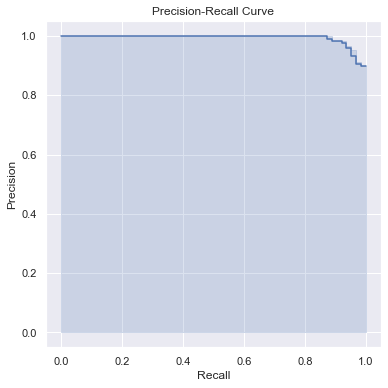

In [29]:
def precision_recall_curve(true_classes, prediction_probabilities):
    precision_, recall_, _ = metrics.precision_recall_curve(
        true_classes, prediction_probabilities[:,1])

    sns.lineplot(recall_,precision_, drawstyle='steps-pre', ci=None)
    sns.mpl.pyplot.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    sns.mpl.pyplot.xlabel('Recall')
    sns.mpl.pyplot.ylabel('Precision')
    sns.mpl.pyplot.title('Precision-Recall Curve');


precision_recall_curve(true_classes, prediction_probabilities)

And now the obvious question, **why do we need so many metrics, can't we just use accuracy?** Check out the advanced exercises for an answer :)

In [ ]:
from scikit-learn import metrics.precision_recall_curve